In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import mygene
import h5py
import networkx as nx
import seaborn as sns
%matplotlib inline


In [10]:
all_prediction = pd.read_csv('C:/Users/renan/Desktop/predict/concat/all_prediction_complete.tsv', sep='\t')

all_prediction

,gene,percent,binary,true,rede
0,A1BG,0.000349,0.0,0.0,hprd
1,A1CF,0.376979,0.0,1.0,hprd
2,A2M,0.156139,0.0,0.0,hprd
3,AAGAB,0.063204,0.0,0.0,hprd
4,AAMP,0.048703,0.0,-1.0,hprd
...,...,...,...,...,...
91278,ZYG11A,0.183819,0.0,0.0,string
91279,ZYG11B,0.177726,0.0,0.0,string
91280,ZYX,0.480673,0.0,0.0,string
91281,ZZEF1,0.359861,0.0,-1.0,string


In [11]:
teste1 = all_prediction.loc[all_prediction['true'] == -1]
teste1

,gene,percent,binary,true,rede
4,AAMP,0.048703,0.0,-1.0,hprd
5,AANAT,0.085974,0.0,-1.0,hprd
7,AARS1,0.108568,0.0,-1.0,hprd
8,AARS2,0.122441,0.0,-1.0,hprd
10,AATF,0.477344,0.0,-1.0,hprd
...,...,...,...,...,...
91267,ZSWIM6,0.302488,0.0,-1.0,string
91268,ZSWIM7,0.267527,0.0,-1.0,string
91273,ZWILCH,0.409323,0.0,-1.0,string
91274,ZWINT,0.377924,0.0,-1.0,string


In [12]:
teste2 = teste1.loc[teste1['binary'] == 1]
teste2

,gene,percent,binary,true,rede
83,ACTA1,0.749845,1.0,-1.0,hprd
85,ACTB,0.795448,1.0,-1.0,hprd
89,ACTL6A,0.525927,1.0,-1.0,hprd
93,ACTN2,0.782486,1.0,-1.0,hprd
208,AHR,0.719131,1.0,-1.0,hprd
...,...,...,...,...,...
90491,XRCC5,0.599642,1.0,-1.0,string
90492,XRCC6,0.622906,1.0,-1.0,string
90549,ZAP70,0.540564,1.0,-1.0,string
90660,ZEB2,0.611880,1.0,-1.0,string


In [13]:
teste2.sort_values('percent')

,gene,percent,binary,true,rede
33210,PSCA,0.500060,1.0,-1.0,iref
90306,WASF1,0.500073,1.0,-1.0,string
12520,DISP1,0.500075,1.0,-1.0,multinet
76467,CLU,0.500129,1.0,-1.0,string
80453,IL1B,0.500139,1.0,-1.0,string
...,...,...,...,...,...
53031,UBE2I,0.991307,1.0,-1.0,cpdb
22285,UBC,0.992686,1.0,-1.0,multinet
69770,SP1,0.993128,1.0,-1.0,pcnet
43680,GRB2,0.998553,1.0,-1.0,cpdb


In [21]:
pd.reset_option('display.max_rows')

teste3 = teste2.loc[teste2['percent'] >= 0.58]
teste3

,gene,percent,binary,true,rede
83,ACTA1,0.749845,1.0,-1.0,hprd
85,ACTB,0.795448,1.0,-1.0,hprd
93,ACTN2,0.782486,1.0,-1.0,hprd
208,AHR,0.719131,1.0,-1.0,hprd
243,AKAP9,0.681006,1.0,-1.0,hprd
...,...,...,...,...,...
90432,WNT7B,0.582863,1.0,-1.0,string
90450,WWOX,0.635805,1.0,-1.0,string
90491,XRCC5,0.599642,1.0,-1.0,string
90492,XRCC6,0.622906,1.0,-1.0,string


In [22]:
pd.set_option('display.max_rows', None)

teste3['gene'].value_counts()

KAT2B        6
SP1          6
HDAC2        6
NR3C1        6
NCK1         6
UBE2I        6
PRKCA        6
CDK1         6
PTK2         6
HDAC3        6
HDAC9        5
KAT5         5
TLE1         5
FOS          5
DMD          5
RUNX2        5
STAT1        5
VIM          5
PSEN1        5
PIAS1        5
BCL2L1       5
NFKB1        5
SHC1         5
PCNA         5
SMAD7        5
ITGB1        5
TTN          5
TNFRSF1A     5
GATA4        5
RELA         5
PXN          5
CHUK         5
TRAF6        5
HTT          5
RBBP4        5
ACTB         5
MAPT         5
PTK2B        5
XRCC5        5
CUL1         5
XRCC6        5
CDK2         5
ESR2         5
BCAR1        5
SIRT1        5
TBP          5
GRB2         5
PRKDC        5
SIN3A        5
SPTAN1       5
SKP2         4
TJP1         4
MAPK9        4
GHR          4
RBL2         4
CSNK2A1      4
RACK1        4
RPS6KA3      4
CSF2RB       4
AKAP9        4
NCOA6        4
MECP2        4
HMGB1        4
NRIP1        4
NID1         4
MAPK14       4
GAPDH     

In [7]:
pd.reset_option('display.max_rows')

In [147]:
soma.loc[soma['Predicted'] == 2]

,gene,Predicted
11,ADAM15,2.0
12,ADAR,2.0
25,ALX1,2.0
37,APBB1,2.0
41,ARF3,2.0
...,...,...
1062,UBTF,2.0
1075,VASP,2.0
1090,WIZ,2.0
1091,WRNIP1,2.0


In [174]:
soma['Predicted'].where(soma['Predicted'] > 2, 0, inplace=True)
soma['Predicted'].where(soma['Predicted'] < 3, 1, inplace=True)


In [175]:
soma

,gene,Predicted
0,AAGAB,0.0
1,ABCD2,0.0
2,ABHD16A,0.0
3,ABLIM3,0.0
4,ABT1,0.0
...,...,...
1129,ZNF670,0.0
1130,ZSCAN21,0.0
1131,ZSWIM2,0.0
1132,ZW10,0.0


In [176]:
soma.loc[soma['Predicted'] == 1]

,gene,Predicted
8,ACVR1,1.0
10,ACVR2A,1.0
24,ALK,1.0
38,APC,1.0
40,ARAF,1.0
...,...,...
1092,XIAP,1.0
1097,YES1,1.0
1101,YWHAG,1.0
1102,YWHAH,1.0


In [39]:
teste11 = teste.loc[teste['Predicted'] == 1]

In [46]:
teste12 = teste11['gene'].value_counts().to_frame()
teste12

,gene
NCOR1,6
PDGFRB,6
SOS1,6
VAV1,6
CREBBP,6
...,...
TRIM21,1
TNFSF13,1
SNAP91,1
IRX4,1


In [48]:
teste12.loc[teste12['gene'] == 3]

,gene
CSF3R,3
HIPK3,3
RING1,3
CTCF,3
HGF,3
AXL,3
GRIA1,3
MSH6,3
GRIP1,3
ETV1,3


In [4]:
teste2 = teste.drop(['Predicted', 'True', 'rede'], axis=1)
teste2

,gene,Probability
0,AKAP1,0.280458
1,CHRDL2,0.189336
2,PPARG,0.760429
3,RAD51AP2,0.037321
4,LRP12,0.232627
...,...,...
6799,FKBP2,0.367772
6800,TLK2,0.315822
6801,NDUFS1,0.141929
6802,ARL4D,0.343029


In [5]:
teste3 = teste.drop(['Probability', 'True', 'rede'], axis=1)
teste3

,gene,Predicted
0,AKAP1,0.0
1,CHRDL2,0.0
2,PPARG,1.0
3,RAD51AP2,0.0
4,LRP12,0.0
...,...,...
6799,FKBP2,0.0
6800,TLK2,0.0
6801,NDUFS1,0.0
6802,ARL4D,0.0


In [6]:
# média de probabilidades do que foi predito pelas 6 redes 

media = teste2.groupby('gene').mean().reset_index()
media

,gene,Probability
0,AAGAB,0.112055
1,ABCD2,0.179984
2,ABHD16A,0.051719
3,ABLIM3,0.198306
4,ABT1,0.119567
...,...,...
1129,ZNF670,0.110188
1130,ZSCAN21,0.142837
1131,ZSWIM2,0.109822
1132,ZW10,0.262325


In [7]:
# Votação majoritária para as probabilidades binárias

# Essa função funciona só que não entendo como fez a votação 

teste4 = teste3.groupby('gene')['Predicted'].apply(lambda x: x.value_counts().idxmax())
major = teste4.to_frame().reset_index()
major


,gene,Predicted
0,AAGAB,0.0
1,ABCD2,0.0
2,ABHD16A,0.0
3,ABLIM3,0.0
4,ABT1,0.0
...,...,...
1129,ZNF670,0.0
1130,ZSCAN21,0.0
1131,ZSWIM2,0.0
1132,ZW10,0.0


In [8]:
major['Predicted'].value_counts()

0.0    1034
1.0     100
Name: Predicted, dtype: int64

In [10]:
# votação majoritária para as probabilidades binárias

# Usando essa função de MODA existem os bimodais, que são genes que empatam na votação, logo ficam duplicadas
# ele coloca NAN nasdplicadas

teste7 = teste3.groupby('gene').apply(pd.DataFrame.mode).reset_index(drop=True)
teste7


,gene,Predicted
0,AAGAB,0.0
1,ABCD2,0.0
2,ABHD16A,0.0
3,ABLIM3,0.0
4,ABT1,0.0
...,...,...
1163,ZNF670,0.0
1164,ZSCAN21,0.0
1165,ZSWIM2,0.0
1166,ZW10,0.0


In [177]:
# Juntando os dataframes de votação majoritária e média de predições + labels originais

testset_predicoes1 = pd.merge(soma, media, how = 'inner', on = 'gene')
testset_predicoes = pd.merge(testset_predicoes1, test_set, how = 'inner', on = 'gene')
testset_predicoes

,gene,Predicted,Probability,label
0,AAGAB,0.0,0.112055,0
1,ABCD2,0.0,0.179984,0
2,ABHD16A,0.0,0.051719,0
3,ABLIM3,0.0,0.198306,0
4,ABT1,0.0,0.119567,0
...,...,...,...,...
1129,ZNF670,0.0,0.110188,0
1130,ZSCAN21,0.0,0.142837,0
1131,ZSWIM2,0.0,0.109822,0
1132,ZW10,0.0,0.262325,0


In [178]:
#testset_predicoes['mean_prob_bin'] = testset_predicoes['Probability'].where(testset_predicoes['Probability'] > 0.5, 0, inplace=True)
#testset_predicoes['mean_prob_bin'] = testset_predicoes['Probability'].where(testset_predicoes['Probability'] <= 0.5, 1, inplace=True)


testset_predicoes['mean_prob_bin'] = (testset_predicoes['Probability'] >= .5).astype(int)

In [179]:
testset_predicoes

,gene,Predicted,Probability,label,mean_prob_bin
0,AAGAB,0.0,0.112055,0,0
1,ABCD2,0.0,0.179984,0,0
2,ABHD16A,0.0,0.051719,0,0
3,ABLIM3,0.0,0.198306,0,0
4,ABT1,0.0,0.119567,0,0
...,...,...,...,...,...
1129,ZNF670,0.0,0.110188,0,0
1130,ZSCAN21,0.0,0.142837,0,0
1131,ZSWIM2,0.0,0.109822,0,0
1132,ZW10,0.0,0.262325,0,0


In [180]:
testset_predicoes['mean_prob_bin'].value_counts()

0    1042
1      92
Name: mean_prob_bin, dtype: int64

In [181]:
testset_predicoes = testset_predicoes.rename(columns={"Predicted": "major_vot", "Probability": "mean_prob"})
testset_predicoes


,gene,major_vot,mean_prob,label,mean_prob_bin
0,AAGAB,0.0,0.112055,0,0
1,ABCD2,0.0,0.179984,0,0
2,ABHD16A,0.0,0.051719,0,0
3,ABLIM3,0.0,0.198306,0,0
4,ABT1,0.0,0.119567,0,0
...,...,...,...,...,...
1129,ZNF670,0.0,0.110188,0,0
1130,ZSCAN21,0.0,0.142837,0,0
1131,ZSWIM2,0.0,0.109822,0,0
1132,ZW10,0.0,0.262325,0,0


In [191]:
part1 = testset_predicoes.loc[testset_predicoes['mean_prob_bin'] == 1]
part1

,gene,major_vot,mean_prob,label,mean_prob_bin
8,ACVR1,1.0,0.650243,1,1
10,ACVR2A,1.0,0.529752,1,1
24,ALK,1.0,0.599644,1,1
38,APC,1.0,0.824287,1,1
40,ARAF,1.0,0.536251,1,1
...,...,...,...,...,...
1092,XIAP,1.0,0.595157,1,1
1097,YES1,1.0,0.673774,1,1
1101,YWHAG,1.0,0.707352,0,1
1102,YWHAH,1.0,0.656547,0,1


In [192]:
part1['label'].value_counts()

1    73
0    19
Name: label, dtype: int64

In [183]:
testset_predicoes.to_csv(f'C:/Users/renan/Desktop/predict/concat/testset_predicoes.tsv', sep='\t', index=False)

--------

In [46]:
teste2 = teste.loc[teste['percent'] >= 0.5]
teste2

,gene,percent,binary,true,rede
37,ABI1,0.707845,1.0,1.0,hprd
38,ABI2,0.512403,1.0,0.0,hprd
41,ABL1,0.962988,1.0,1.0,hprd
83,ACTA1,0.749845,1.0,-1.0,hprd
85,ACTB,0.795448,1.0,-1.0,hprd
...,...,...,...,...,...
90544,YY1,0.598041,1.0,1.0,string
90549,ZAP70,0.540564,1.0,-1.0,string
90659,ZEB1,0.587523,1.0,1.0,string
90660,ZEB2,0.611880,1.0,-1.0,string


In [47]:
teste3 = teste2.loc[teste2['true'] == -1]
teste3

,gene,percent,binary,true,rede
83,ACTA1,0.749845,1.0,-1.0,hprd
85,ACTB,0.795448,1.0,-1.0,hprd
89,ACTL6A,0.525927,1.0,-1.0,hprd
93,ACTN2,0.782486,1.0,-1.0,hprd
208,AHR,0.719131,1.0,-1.0,hprd
...,...,...,...,...,...
90491,XRCC5,0.599642,1.0,-1.0,string
90492,XRCC6,0.622906,1.0,-1.0,string
90549,ZAP70,0.540564,1.0,-1.0,string
90660,ZEB2,0.611880,1.0,-1.0,string


In [48]:
teste3['gene'].value_counts()

RELA        6
GHR         6
CDK2        6
NCK1        6
HMGB1       6
           ..
CSE1L       1
CDH6        1
LILRB2      1
C10orf90    1
ZPBP2       1
Name: gene, Length: 2194, dtype: int64

In [50]:
teste2.loc[teste2['gene'] == 'HMGB1']

,gene,percent,binary,true,rede
3613,HMGB1,0.633052,1.0,-1.0,hprd
14595,HMGB1,0.693507,1.0,-1.0,multinet
28852,HMGB1,0.517068,1.0,-1.0,iref
44105,HMGB1,0.759709,1.0,-1.0,cpdb
61314,HMGB1,0.888870,1.0,-1.0,pcnet
80028,HMGB1,0.562711,1.0,-1.0,string


In [185]:
unity = pd.read_csv('C:/Users/renan/Desktop/predict/test_predictions_unity.csv')
unity

,gene,Predicted,Probability,True
0,RCN2,0.0,0.371315,0.0
1,GABBR2,0.0,0.307026,0.0
2,PLEKHO1,0.0,0.206258,0.0
3,MYO1F,0.0,0.386315,0.0
4,NEIL2,0.0,0.199618,0.0
...,...,...,...,...
1129,WIZ,0.0,0.361665,0.0
1130,SCAF11,0.0,0.423587,0.0
1131,EME1,0.0,0.408392,0.0
1132,MTAP,0.0,0.329007,1.0


In [187]:
part = unity.loc[unity['Predicted'] == 1]
part

,gene,Predicted,Probability,True
18,MSH6,1.0,0.568709,1.0
24,HRAS,1.0,0.663499,1.0
25,IARS1,1.0,0.505547,0.0
27,EGR1,1.0,0.703217,1.0
32,IKZF1,1.0,0.514795,1.0
...,...,...,...,...
1091,ARAF,1.0,0.562302,1.0
1092,ZNF148,1.0,0.500261,0.0
1093,CD5,1.0,0.522565,0.0
1117,ALK,1.0,0.585001,1.0


In [188]:
part['True'].value_counts()

1.0    68
0.0    51
Name: True, dtype: int64

In [186]:
unity['Predicted'].value_counts()

0.0    1015
1.0     119
Name: Predicted, dtype: int64

In [21]:
predict_test_string = pd.read_csv(f'C:/Users/renan/Desktop/predict/test_predictions_string.csv')
predict_test_string

,gene,Predicted,Probability,True
0,MYL12B,0.0,0.387705,0.0
1,AKAP1,0.0,0.419828,0.0
2,EID1,0.0,0.305836,0.0
3,UCN3,0.0,0.219629,0.0
4,RBM11,0.0,0.231891,0.0
...,...,...,...,...
1129,FKBP2,0.0,0.367772,0.0
1130,TLK2,0.0,0.315822,0.0
1131,NDUFS1,0.0,0.141929,0.0
1132,ARL4D,0.0,0.343029,0.0


In [22]:
predict_test_string['Predicted'].value_counts()

0.0    1002
1.0     132
Name: Predicted, dtype: int64

In [23]:
part = predict_test_string.loc[predict_test_string['Predicted'] == 1]
part

,gene,Predicted,Probability,True
5,IGF2,1.0,0.567363,1.0
10,ERBB4,1.0,0.654702,1.0
17,SETBP1,1.0,0.510003,1.0
20,ITGAV,1.0,0.553954,1.0
30,LMNA,1.0,0.554419,1.0
...,...,...,...,...
1071,ASF1A,1.0,0.500367,0.0
1079,HAND2,1.0,0.594197,0.0
1084,FOXO3,1.0,0.617513,1.0
1090,ARHGAP35,1.0,0.517905,1.0


In [24]:
part['True'].value_counts()

1.0    86
0.0    46
Name: True, dtype: int64

In [2]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt
from sklearn.metrics import auc

In [48]:
SMALL_SIZE = 10 #10 para individual 
MEDIUM_SIZE = 18 #18 para figura individual #26 para pagina completa
BIGGER_SIZE = 20 #20 para figura individual #26 para pagina completa

plt.rc('font', size=BIGGER_SIZE)          
plt.rc('axes', titlesize=MEDIUM_SIZE)     
plt.rc('axes', labelsize=MEDIUM_SIZE)    
plt.rc('xtick', labelsize=MEDIUM_SIZE)    # MEDIUM_SIZE para individual
plt.rc('ytick', labelsize=MEDIUM_SIZE)    # MEDIUM_SIZE para individual
plt.rc('legend', fontsize=MEDIUM_SIZE)    
plt.rc('figure', titlesize=BIGGER_SIZE)  

<Figure size 921.6x518.4 with 0 Axes>

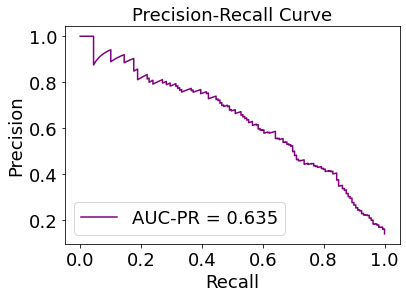

In [59]:
plt.figure(figsize=(12.80,7.20))

precision, recall, thresholds = precision_recall_curve(predict_test_string['True'], predict_test_string['Probability'])
lab = 'AUC-PR = %0.3f' % (auc(recall, precision))

#create precision recall curve
fig, ax = plt.subplots()

ax.plot(recall, precision, label=lab, color='purple')

#add axis labels to plot
ax.set_title('Precision-Recall Curve')
ax.set_ylabel('Precision')
ax.set_xlabel('Recall')
plt.legend(loc="lower left")


file_name = f"C:/Users/renan/Desktop/teste/aucpr/aucpr_string.pdf"
plt.savefig(file_name, format="pdf", bbox_inches="tight")


#display plot
plt.show()

In [61]:
predict_test = pd.read_csv(f'C:/Users/renan/Desktop/predict/concat/testset_predicoes.tsv', sep='\t')
predict_test



,gene,major_vot,mean_prob,label,mean_prob_bin
0,AAGAB,0.0,0.112055,0,0
1,ABCD2,0.0,0.179984,0,0
2,ABHD16A,0.0,0.051719,0,0
3,ABLIM3,0.0,0.198306,0,0
4,ABT1,0.0,0.119567,0,0
...,...,...,...,...,...
1129,ZNF670,0.0,0.110188,0,0
1130,ZSCAN21,0.0,0.142837,0,0
1131,ZSWIM2,0.0,0.109822,0,0
1132,ZW10,0.0,0.262325,0,0


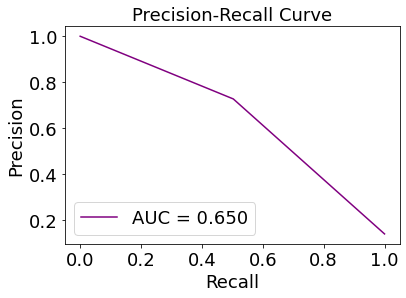

In [92]:
precision, recall, thresholds = precision_recall_curve(predict_test['label'], predict_test['major_vot'])
lab = 'AUC = %0.3f' % (auc(recall, precision))



#create precision recall curve
fig, ax = plt.subplots()

ax.plot(recall, precision, label=lab, color='purple')

#add axis labels to plot
ax.set_title('Precision-Recall Curve')
ax.set_ylabel('Precision')
ax.set_xlabel('Recall')
plt.legend(loc="lower left")





#display plot
plt.show()

In [3]:
hprd = pd.read_csv(f'C:/Users/renan/Desktop/predict/test_predictions_hprd.csv')

multinet = pd.read_csv(f'C:/Users/renan/Desktop/predict/test_predictions_multinet.csv')

iref = pd.read_csv(f'C:/Users/renan/Desktop/predict/test_predictions_iref.csv')

cpdb = pd.read_csv(f'C:/Users/renan/Desktop/predict/test_predictions_cpdb.csv')

pcnet = pd.read_csv(f'C:/Users/renan/Desktop/predict/test_predictions_pcnet.csv')

string = pd.read_csv(f'C:/Users/renan/Desktop/predict/test_predictions_string.csv')

unity = pd.read_csv(f'C:/Users/renan/Desktop/predict/test_predictions_unity.csv')

test = pd.read_csv(f'C:/Users/renan/Desktop/predict/concat/testset_predicoes.tsv', sep='\t')


In [9]:
SMALL_SIZE = 10 #10 para individual 
MEDIUM_SIZE = 18 #18 para figura individual #26 para pagina completa
BIGGER_SIZE = 20 #20 para figura individual #26 para pagina completa

plt.rc('font', size=BIGGER_SIZE)          
plt.rc('axes', titlesize=MEDIUM_SIZE)     
plt.rc('axes', labelsize=MEDIUM_SIZE)    
plt.rc('xtick', labelsize=MEDIUM_SIZE)    # MEDIUM_SIZE para individual
plt.rc('ytick', labelsize=MEDIUM_SIZE)    # MEDIUM_SIZE para individual
plt.rc('legend', fontsize=16)    
plt.rc('figure', titlesize=BIGGER_SIZE)  

<Figure size 432x288 with 0 Axes>

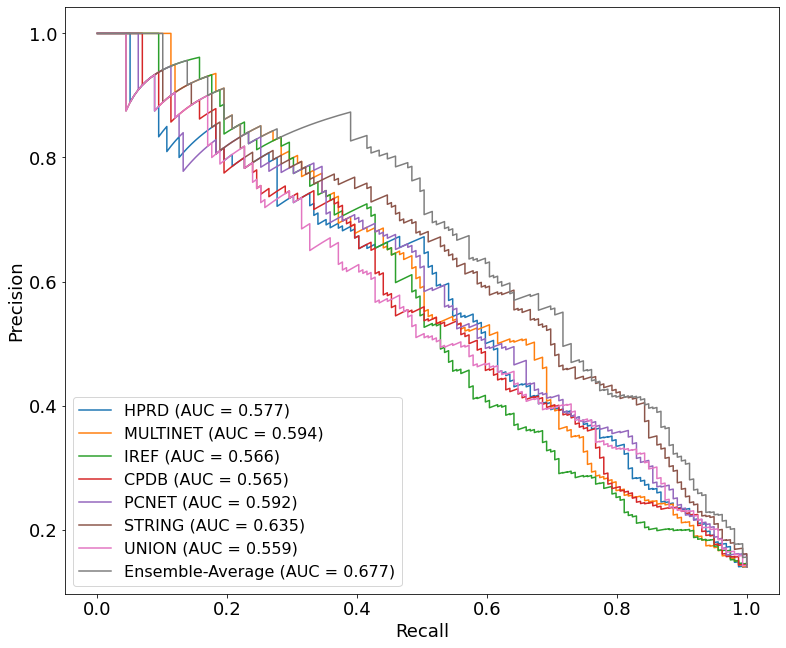

In [10]:
plt.figure(0).clf()
plt.figure(figsize=(12.80,10.80))

precision, recall, thresholds = precision_recall_curve(hprd['True'], hprd['Probability'])
lab = "HPRD (AUC = %0.3f)" % (auc(recall, precision))
plt.plot(recall, precision, label=lab)

precision, recall, thresholds = precision_recall_curve(multinet['True'], multinet['Probability'])
lab = "MULTINET (AUC = %0.3f)" % (auc(recall, precision))
plt.plot(recall, precision, label=lab)

precision, recall, thresholds = precision_recall_curve(iref['True'], iref['Probability'])
lab = "IREF (AUC = %0.3f)" % (auc(recall, precision))
plt.plot(recall, precision, label=lab)

precision, recall, thresholds = precision_recall_curve(cpdb['True'], cpdb['Probability'])
lab = "CPDB (AUC = %0.3f)" % (auc(recall, precision))
plt.plot(recall, precision, label=lab)

precision, recall, thresholds = precision_recall_curve(pcnet['True'], pcnet['Probability'])
lab = "PCNET (AUC = %0.3f)" % (auc(recall, precision))
plt.plot(recall, precision, label=lab)

precision, recall, thresholds = precision_recall_curve(string['True'], string['Probability'])
lab = "STRING (AUC = %0.3f)" % (auc(recall, precision))
plt.plot(recall, precision, label=lab)

precision, recall, thresholds = precision_recall_curve(unity['True'], unity['Probability'])
lab = "UNION (AUC = %0.3f)" % (auc(recall, precision))
plt.plot(recall, precision, label=lab)

precision, recall, thresholds = precision_recall_curve(test['label'], test['mean_prob'])
lab = "Ensemble-Average (AUC = %0.3f)" % (auc(recall, precision))
plt.plot(recall, precision, label=lab)

plt.xlabel("Recall")
plt.ylabel("Precision")

plt.legend(loc="lower left")


file_name = f"C:/Users/renan/Desktop/teste/aucpr/aucpr_curve4.pdf"
plt.savefig(file_name, format="pdf", bbox_inches="tight")
